In [1]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import cv2 as cv
import glob

In [2]:
def undistort_image(image_path:str,cal_mat:np.array,cal_dist:np.array,output_image:str):
    img = cv.imread(image_path)
    h, w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(cal_mat, cal_dist, (w,h), 1, (w,h))
    # undistort
    dst = cv.undistort(img, cal_mat, cal_dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    cv.imwrite(output_image, dst)


camera matrix: [[3.47049475e+03 0.00000000e+00 2.35128260e+03]
 [0.00000000e+00 3.46797253e+03 1.29355372e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
camera distortions:  [[-8.05793459e-02  1.64516638e+00 -1.07173657e-03  5.48049816e-03
  -7.16626486e+00]]


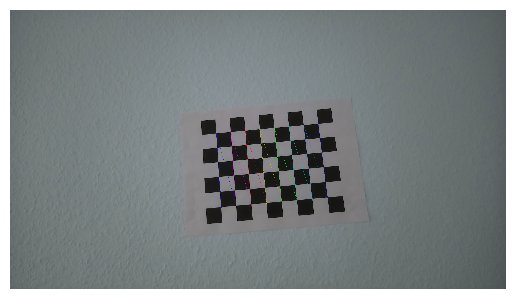

In [3]:

 
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
# images = glob.glob('*.jpg')
imags_path = r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn\using"
images = os.listdir(imags_path)
 
for fname in images:
    img = cv.imread(os.path.join(imags_path,fname))
    # plt.imshow(img,cmap="gray")
    # plt.show()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
#  # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (6,8), None)
    # print(corners)
 
 # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners2)

    cv.drawChessboardCorners(img, (6,8), corners2, ret)
    # plt.imshow(img,cmap="gray")
    # plt.axis("off")
    # plt.show()

# Calibration computation
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("camera matrix:",mtx)
print("camera distortions: ",dist)
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.show()

In [4]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [12]:
ret

0.7884234588077017

In [11]:
rvecs

(array([[-0.32643165],
        [-0.12256841],
        [ 1.44093482]]),
 array([[-0.03617647],
        [-0.14671452],
        [-1.55536587]]),
 array([[0.28831331],
        [0.25907193],
        [1.35750104]]),
 array([[-0.33675883],
        [-0.16881804],
        [ 1.51662395]]),
 array([[-0.39249274],
        [-0.51645631],
        [ 1.32617153]]),
 array([[-0.71460519],
        [ 0.57780585],
        [ 1.3876832 ]]),
 array([[ 0.05201919],
        [ 0.05289036],
        [-1.52990808]]),
 array([[-0.15149444],
        [ 0.17981736],
        [ 1.47230678]]))

In [5]:
mtx

array([[3.47049475e+03, 0.00000000e+00, 2.35128260e+03],
       [0.00000000e+00, 3.46797253e+03, 1.29355372e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [13]:
tvecs

(array([[ 3.77200656],
        [-6.45605628],
        [25.8340677 ]]),
 array([[-5.43118301],
        [-0.29341157],
        [21.23897674]]),
 array([[ 2.50308498],
        [-2.56672146],
        [21.67582813]]),
 array([[ 6.44110543],
        [-5.41172787],
        [24.58574141]]),
 array([[-1.78342982],
        [-3.80315248],
        [28.79296969]]),
 array([[ 3.00015749],
        [-0.32016418],
        [23.21795004]]),
 array([[-2.60691028],
        [ 2.88669415],
        [19.93800095]]),
 array([[ 3.75842103],
        [-1.6969632 ],
        [25.49825085]]))

In [6]:
dist

array([[-8.05793459e-02,  1.64516638e+00, -1.07173657e-03,
         5.48049816e-03, -7.16626486e+00]])

In [7]:
img = cv.imread(os.path.join(imags_path,fname))
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [8]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
 
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

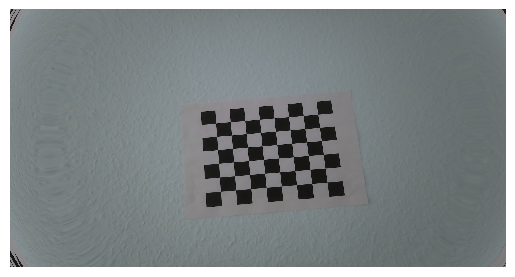

In [9]:
plt.imshow(dst,cmap="gray")
plt.axis("off")
plt.show()

In [10]:
input_img_path = r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn\16.05.2024_images\images"
output_img_path = r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn\16.05.2024_images\undistorted"


images = os.listdir(input_img_path)

for fname in images:
    img = os.path.join(input_img_path,fname)
    output_img = os.path.join(output_img_path,fname)

    undistort_image(img,mtx,dist,output_img)

KeyboardInterrupt: 